In [1]:
import re
import string
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import nltk

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet

from nltk.util import ngrams
from collections import Counter

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
script_df = pd.read_csv('script.csv',delimiter=',')

In [3]:
script_df

,Character,Dialogue,Season,Episode
0,HTTPS,//transcripts.foreverdreaming.org/ 01x01 - The,1,1
1,PILOTHTTPS,//transcripts.foreverdreaming.org/viewtopic.ph...,1,1
2,LORELAI,"Please, Luke. Please, please, please.",1,1
3,LUKE,How many cups have you had this morning?,1,1
4,LORELAI,None.,1,1
...,...,...,...,...
117874,RORY,Well It wasn't very flattering.,7,22
117875,LORELAI,Well how will people know you're the world's g...,7,22
117876,RORY,I don't know.,7,22
117877,LORELAI,I guess they'll just have to read your stuff.,7,22


In [4]:
# Initialize STOPWORDS
STOPWORDS = set(stopwords.words('english'))

def preprocess_text(text, return_tokens=False):
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', " ", text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in STOPWORDS]
    
    # Remove extra white spaces (single-character tokens)
    tokens = [token for token in tokens if len(token) > 1]
    
    if return_tokens:
        return tokens
    else:
        return " ".join(tokens)

In [5]:
script_df = script_df.dropna(axis=0)
script_df['Dialogue'] = script_df['Dialogue'].apply(lambda x: preprocess_text(x))    

C:\Users\asus\AppData\Local\Temp\ipykernel_19980\3359952425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  script_df['Dialogue'] = script_df['Dialogue'].apply(lambda x: preprocess_text(x))


In [6]:
script_df.to_csv('cleaned_script.csv', index=False)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg

# # Sample data to simulate the 'scripts' DataFrame
# # Replace this with your actual DataFrame
# scripts = pd.DataFrame({
#     'Character': ['LORELAI', 'RORY', 'LUKE', 'EMILY', 'RICHARD',  
#                        'SOOKIE', 'LANE', 'PARIS', 'JESS', 'LOGAN',  
#                         'DEAN', 'KIRK', 'MISS PATTY', 'TAYLOR', 'MICHEL',  
#                         'JACKSON', 'CHRISTOPHER', 'APRIL', 'MADDOX', 'DOYLE',  
#                         'ZACK', 'GIL', 'BRIAN', 'MRS. KIM', 'SHERRY',  
#                         'LIZ', 'TJ', 'ANNA', 'COLIN', 'FINN',  
#                         'MARTY', 'MAX', 'TRISTAN', 'DIGGER', 'MISS CELINE']
# })

# Count the number of dialogues per character
character_counts = script_df['Character'].value_counts().reset_index()
character_counts.columns = ['Character', 'n']



In [8]:
print(character_counts)

        Character      n
0         LORELAI  32280
1            RORY  22822
2            LUKE   9695
3           EMILY   6583
4          SOOKIE   4354
...           ...    ...
1458       LIZLIZ      1
1459   PILOTHTTPS      1
1460    BIKEHTTPS      1
1461   MSSINCLAIR      1
1462  DOORLORELAI      1

[1463 rows x 2 columns]


C:\Users\asus\AppData\Local\Temp\ipykernel_19980\1176193759.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\asus\AppData\Local\Temp\ipykernel_19980\1176193759.py:6: UserWarning: 
The palette list has fewer values (6) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


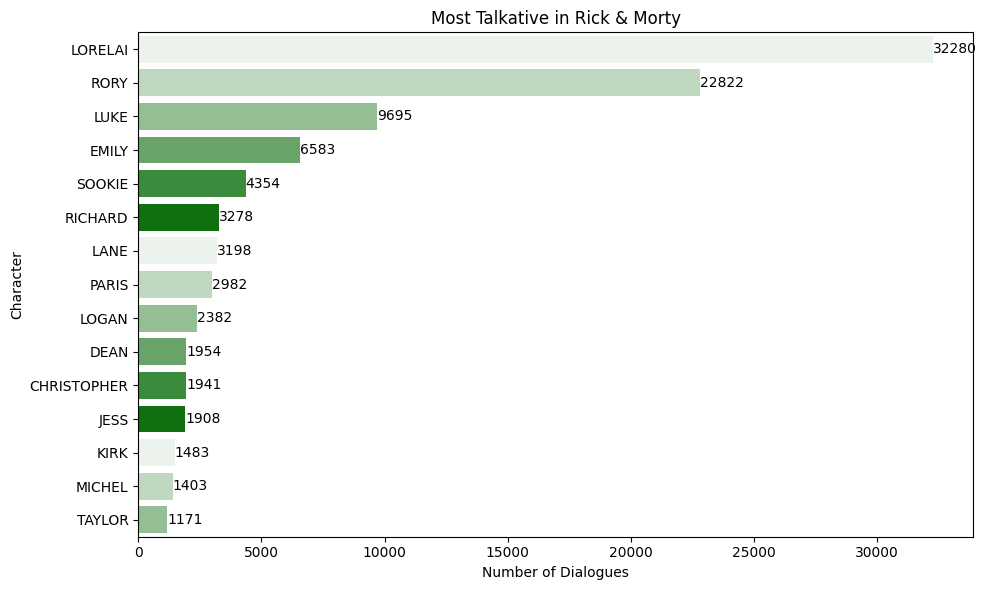

Pickle Rick image not found. Make sure the file path is correct.


In [9]:

# Select the top 15 characters
top_15_characters = character_counts.head(15)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_15_characters,
    x='n',
    y='Character',
    palette=sns.light_palette("green", reverse=False, as_cmap=False)
)

# Add labels to the bars
for index, row in top_15_characters.iterrows():
    plt.text(row['n'] + 0.1, index, str(row['n']), color='black', va='center')

# Add labels and title
plt.xlabel("Number of Dialogues")
plt.ylabel("Character")
plt.title("Most Talkative in Rick & Morty")
plt.tight_layout()

# Save the plot for later image addition
plot_path = "top_15_characters_plot.png"
plt.savefig(plot_path)
plt.show()

# Optional: Add an image (e.g., Pickle Rick) to the plot
try:
    # Load the saved plot and additional image (e.g., Pickle Rick)
    plot_image = mpimg.imread(plot_path)
    pickle_rick_image = Image.open("../input/RickAndMortyScripts/pickle rick.jpg")

    # Display the plot with the additional image
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(plot_image)
    ax.axis('off')

    # Add the Pickle Rick image to the plot
    pickle_rick_image.thumbnail((200, 200))  # Resize the image
    fig.figimage(pickle_rick_image, xo=800, yo=100, zorder=1)
    plt.show()

except FileNotFoundError:
    print("Pickle Rick image not found. Make sure the file path is correct.")


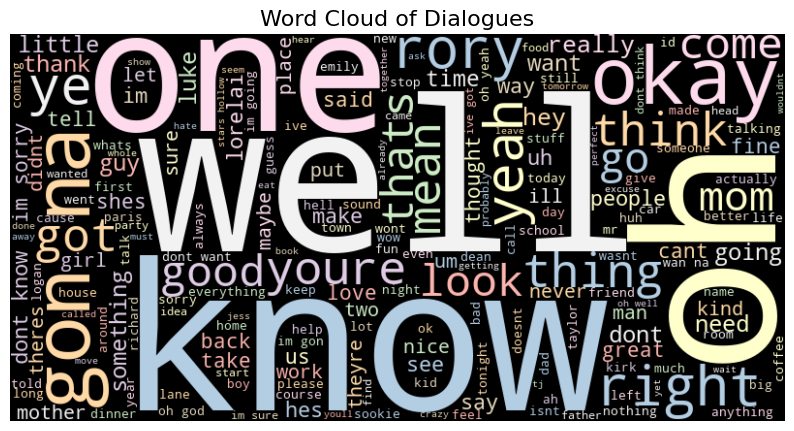

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'scripts' is your DataFrame and 'Dialog' is the column containing the dialogues
# Combine all dialogues into a single string
all_dialogues = " ".join(script_df['Dialogue'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="black",
    colormap="Pastel1",  # Similar to 'random-light' in R
    contour_color="white",
    contour_width=1,
    prefer_horizontal=0.9,  # Adjust text orientation preference
).generate(all_dialogues)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Dialogues", fontsize=16)
plt.show()
